## Making fun pictures:
- dress (ID 3) 400 - Need 400 more. - 1 transformation / image<br>
- Pullover (ID 2) - Need 700 more.  7 transformations/image<br>
- top (ID 0) - Need 799 more.  ~37 transformations / image if we take 20 images from validation set. 1 image with 39 transformations <br>
- trouser (ID 1) - Need 799 more. ~37 transformations / image. 1 image with 39 transformations<br>
<br>
---
Available Transformations:<br>
1. one Flip Image<br>
2. 16 different rotations<br>
3. 4 lighten image<br>
4. 4 darken image<br>
5. 7 types of noise addition.<br>

#### Tops & Trousers: <br>
- 7 noise + 6 rotation + 4 light + 4 dark = 24 transformations<br>
- 7 noise/flip + 4 rot/light + 4 rot/dark + 1 dark/noise= 16 transformations<br>

#### Pullovers: 
4 noise/flip + 1 rot/light + 1 rot/dark + 1 dark/noise= 7 transformations<br>

#### Dress:
1 noise/flip for each dress.


In [32]:
from PIL import Image, ImageEnhance
import skimage
from load_data import load_data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transfomations import all_rot, all_noise, all_expo, show_image, noise_exp, noise_flip, rot_expose

In [33]:
x_tr, y_tr_df = load_data('x_train.csv', 'y_train.csv')
x_va, y_va_df = load_data('x_valid.csv', 'y_valid.csv')
x_te = load_data('x_test.csv', 'y_valid.csv')[0]

In [34]:
# Combine training and validation datasets
x_all_sc = np.divide(np.vstack((x_tr,x_va)), 255)
y_all_df = pd.concat([y_tr_df, y_va_df])

In [35]:
#Scaling images between 0 and 1. Works better with skimage
x_tr_sc=np.divide(x_tr, 255)
x_va_sc = np.divide(x_va, 255)

In [36]:
#getting index for each class in training set:
top_int = y_tr_df.index[y_tr_df['class_name']=='top']    #index 1
trous_int = y_tr_df.index[y_tr_df['class_name']=='trouser']    #index 11
dress_int =(y_tr_df.index[y_tr_df['class_name']=='dress']).tolist()
pull_int =(y_tr_df.index[y_tr_df['class_name']=='pullover']).tolist()
sneaker_int =(y_tr_df.index[y_tr_df['class_name']=='sneaker']).tolist()
sandal_int =(y_tr_df.index[y_tr_df['class_name']=='sandal']).tolist()

## Transformation Funcs for combination

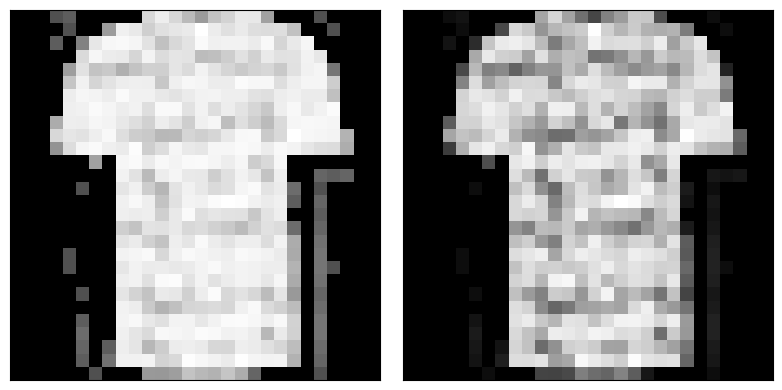

In [37]:
#Testing
top = ((x_tr_sc[top_int]).reshape((28,28)))
test1 = all_expo(top, 2, 'light')
# Plot test data
fig, axgrid = plt.subplots(1, 2, figsize=(8, 4))
shirt1 = test1[0]
shirt2 = test1[1]
ax5 = axgrid[0]
ax6 = axgrid[1]
x_SS = (shirt1).reshape((28,28))
ax5.imshow(x_SS, vmin=0, vmax=1, cmap='gray')
ax5.set_xticks([]); ax5.set_yticks([]);

x_SS2 = shirt2.reshape((28,28))
ax6.imshow(x_SS2, vmin=0, vmax=1, cmap='gray')
ax6.set_xticks([]); ax6.set_yticks([]);

plt.tight_layout();
plt.show();

## Creating New Dataset

#### Dresses

In [38]:
#adding transformed dresses:
dresses = x_tr_sc[dress_int, :]
print(dresses.shape)
all_dresses = dresses
for i in range(0, 400):
    dress_pic= (dresses[i, :]).reshape((28, 28))
    new_dress = noise_flip(dress_pic, 1)
    all_dresses = np.vstack((all_dresses, new_dress))
print(all_dresses.shape)
assert(all_dresses.shape == (800, 784))

(400, 784)
(800, 784)


#### Pullovers

In [39]:
# Now the pull overs
# 4 noise/flip + 1 rot/light + 1 rot/dark + 1 dark/noise= 7 transformations
pulls = x_tr_sc[pull_int, :]
all_pulls = pulls
for i in range(0, 100):
    pull_pic= (pulls[i, :]).reshape((28, 28))

    #get four noisy & flipped image/pullovr
    new_pull1 = noise_flip(pull_pic, 4) 
    all_pulls = np.vstack((all_pulls, new_pull1))

    #Adding 1 rotated and lightened version of each pullover
    new_pull2 = rot_expose(pull_pic, 1, 'light')
    all_pulls = np.vstack((all_pulls, new_pull2))

    #adding 1 rotated and darkedned version of each pullover
    new_pull3 = rot_expose(pull_pic, 1, 'dark')
    all_pulls = np.vstack((all_pulls, new_pull3))
    
    #get 1 noisy & darkened image/pullovr
    new_pull4 = noise_exp(pull_pic, 1, 'dark')
    all_pulls = np.vstack((all_pulls, new_pull4))

assert(all_pulls.shape == (800, 784))

#### Pants

In [40]:
#7 noise + 6 rotation + 4 light + 4 dark = 24 transformations<br>
#7 noise/flip + 4 rot/light + 4 rot/dark + 1 dark/noise= 16 transformations
va_trouser_idx = (y_va_df.index[y_va_df['class_name']=='trouser']).tolist()
va_trousers = x_va_sc[va_trouser_idx[:20], :]
assert(va_trousers.shape == (20, 784))
tr_pant=x_tr_sc[trous_int, :]
trousers = np.vstack((tr_pant, va_trousers))
assert(trousers.shape == (21, 784))

all_trous = trousers    #The final array to be returned

#two additional transformation to tr_pant:
tr_pant_pic= (tr_pant).reshape((28, 28))
tr_flipped = (np.fliplr(tr_pant_pic))
tr_flip_light =all_expo(tr_flipped, 1, 'light')
all_trous = np.vstack((all_trous, tr_flipped.reshape((1, 784))))
all_trous = np.vstack((all_trous, tr_flip_light))

for i in range(0, 21):
    pant_pic= (trousers[i, :]).reshape((28, 28))

    # All seven noise
    noisy_pant = all_noise(pant_pic)  
    all_trous = np.vstack((all_trous, noisy_pant))

    light_pant = all_expo(pant_pic, 4, 'light')
    all_trous = np.vstack((all_trous, light_pant))

    dark_pant = all_expo(pant_pic, 4, 'dark')
    all_trous = np.vstack((all_trous, dark_pant))

    rot_pant = all_rot(pant_pic, 6)
    all_trous = np.vstack((all_trous, rot_pant))

    #get four noisy & flipped image/pullovr
    new_pant1 = noise_flip(pant_pic, 7) 
    all_trous = np.vstack((all_trous, new_pant1))

    #Adding 1 rotated and lightened version of each pantover
    new_pant2 = rot_expose(pant_pic, 4, 'light')
    all_trous = np.vstack((all_trous, new_pant2))

    #adding 1 rotated and darkedned version of each pantover
    new_pant3 = rot_expose(pant_pic, 4, 'dark')
    all_trous = np.vstack((all_trous, new_pant3))
    
    #get 1 noisy & darkened image/pantovr
    new_pant4 = noise_exp(pant_pic, 1, 'dark')
    all_trous = np.vstack((all_trous, new_pant4))
    
print(all_trous.shape)
assert(all_trous.shape == (800, 784))

(800, 784)


#### tops

In [41]:
#7 noise + 6 rotation + 4 light + 4 dark = 24 transformations<br>
#7 noise/flip + 4 rot/light + 4 rot/dark + 1 dark/noise= 16 transformations
va_tops_idx = (y_va_df.index[y_va_df['class_name']=='top']).tolist()
va_tops = x_va_sc[va_tops_idx[:20], :]
assert(va_tops.shape == (20, 784))
tr_top=x_tr_sc[top_int, :]
tops = np.vstack((tr_top, va_tops))
assert(tops.shape == (21, 784))

all_tops = tops    #The final array to be returned

#two additional transformation to tr_pant:
tr_top_pic= (tr_top).reshape((28, 28))
tr_flipped_top = (np.fliplr(tr_top_pic))
tr_flip_light =all_expo(tr_flipped_top, 1, 'light')
all_tops = np.vstack((all_tops, tr_flipped.reshape((1, 784))))
all_tops = np.vstack((all_tops, tr_flip_light))

for i in range(0, 21):
    top_pic= (trousers[i, :]).reshape((28, 28))

    # All seven noise
    noisy_top = all_noise(top_pic)  
    all_tops = np.vstack((all_tops, noisy_top))

    light_top = all_expo(top_pic, 4, 'light')
    all_tops = np.vstack((all_tops, light_top))

    dark_top = all_expo(top_pic, 4, 'dark')
    all_tops = np.vstack((all_tops, dark_top))

    rot_top = all_rot(top_pic, 6)
    all_tops = np.vstack((all_tops, rot_top))

    #get four noisy & flipped image/pullovr
    new_top1 = noise_flip(top_pic, 7) 
    all_tops = np.vstack((all_tops, new_top1))

    #Adding 1 rotated and lightened version of each pantover
    new_top2 = rot_expose(top_pic, 4, 'light')
    all_tops = np.vstack((all_tops, new_top2))

    #adding 1 rotated and darkedned version of each pantover
    new_top3 = rot_expose(top_pic, 4, 'dark')
    all_tops = np.vstack((all_tops, new_top3))
    
    #get 1 noisy & darkened image/pantovr
    new_top4 = noise_exp(top_pic, 1, 'dark')
    all_tops = np.vstack((all_tops, new_top4))
    
print(all_tops.shape)
assert(all_tops.shape == (800, 784))

(800, 784)


#### Combining all x

In [52]:
#New x train data SCALED
new_x_tr_sc = np.vstack((all_trous, all_tops)) 
new_x_tr_sc = np.vstack((new_x_tr_sc, all_pulls ))
new_x_tr_sc = np.vstack((new_x_tr_sc, all_dresses))
new_x_tr_sc = np.vstack((new_x_tr_sc, x_tr_sc[sneaker_int, :]))
new_x_tr_sc = np.vstack((new_x_tr_sc, x_tr_sc[sandal_int, :]))

assert(new_x_tr_sc.shape== (4800, 784))

#making train_y_2
new_y_tr = np.tile(1, 800) 
new_y_tr = np.hstack((new_y_tr, np.tile(0, 800)))
new_y_tr = np.hstack((new_y_tr, np.tile(2, 800)))
new_y_tr = np.hstack((new_y_tr, np.tile(3, 800)))
new_y_tr = np.hstack((new_y_tr, np.tile(7, 800)))
new_y_tr = np.hstack((new_y_tr, np.tile(5, 800)))
assert(new_y_tr.shape== (4800, ))


# New validation set
va_dress_idx =(y_va_df.index[y_va_df['class_name']=='dress']).tolist()
va_pull_idx =(y_va_df.index[y_va_df['class_name']=='pullover']).tolist()
va_sneaker_idx =(y_va_df.index[y_va_df['class_name']=='sneaker']).tolist()
va_sandal_idx =(y_va_df.index[y_va_df['class_name']=='sandal']).tolist()

va_80_pants = x_va_sc[va_trouser_idx[20:], :]
assert(va_80_pants.shape == (80, 784))
va_80_tops = x_va_sc[va_tops_idx[20:], :]
assert(va_80_pants.shape == (80, 784))
va_100_dress= x_va_sc[va_dress_idx]
va_100_pull = x_va_sc[va_pull_idx]
va_100_sneakers = x_va_sc[va_sneaker_idx]
va_100_sandal = x_va_sc[va_sandal_idx]

new_x_va_sc = np.vstack((va_80_pants, va_80_tops)) 
new_x_va_sc = np.vstack((new_x_va_sc, va_100_pull ))
new_x_va_sc = np.vstack((new_x_va_sc, va_100_dress))
new_x_va_sc = np.vstack((new_x_va_sc, va_100_sneakers))
new_x_va_sc = np.vstack((new_x_va_sc, va_100_sandal))

#making train_y_2
new_y_va = np.tile(1, 80) 
new_y_va = np.hstack((new_y_va, np.tile(0, 80)))
new_y_va = np.hstack((new_y_va, np.tile(2, 100)))
new_y_va = np.hstack((new_y_va, np.tile(3, 100)))
new_y_va = np.hstack((new_y_va, np.tile(7, 100)))
new_y_va = np.hstack((new_y_va, np.tile(5, 100)))

print(new_y_va.shape)
assert(new_y_va.shape== (560, ))


(560,)


## Testing each transformation to find bounds

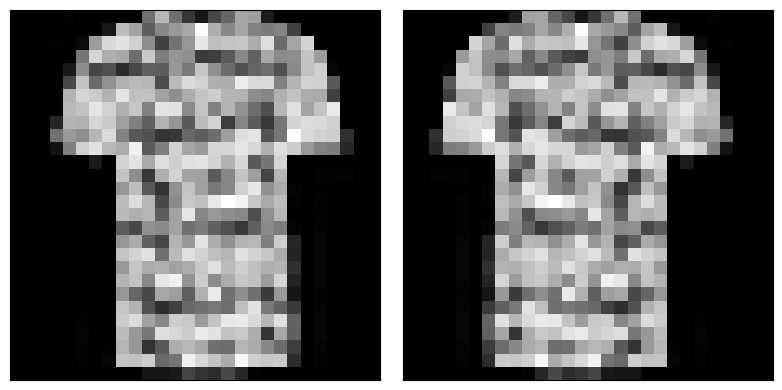

In [53]:
#Flip shirt, just use numpy...
top = (x_tr_sc[top_int]).reshape((28,28))
flip_top = (np.fliplr(top))
show_image(x_tr_sc, top_int, flip_top)

#Flipped image. Also array of new top images
new_tops = flip_top.reshape((1, 784))   #1

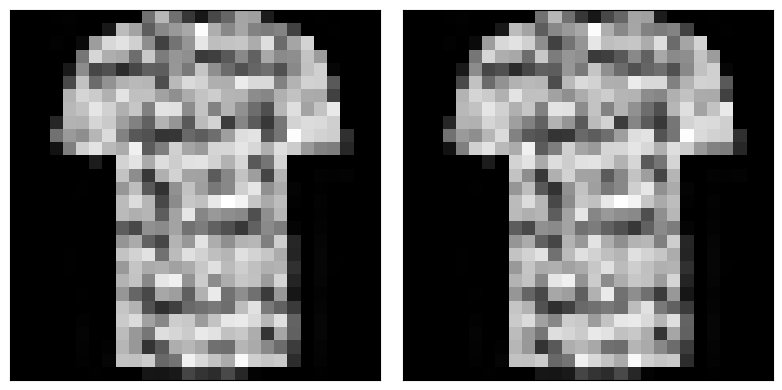

In [54]:
light_top1 = skimage.exposure.adjust_gamma(top, 0.9)    # light 0.1 -0.9 
light_top2 = skimage.exposure.adjust_gamma(top, 0.1)  
dark_top1 = skimage.exposure.adjust_gamma(top, 2)    #Dark 2 - 3
dark_top2 = skimage.exposure.adjust_gamma(top, )    

show_image(x_tr_sc, top_int, dark_top2)

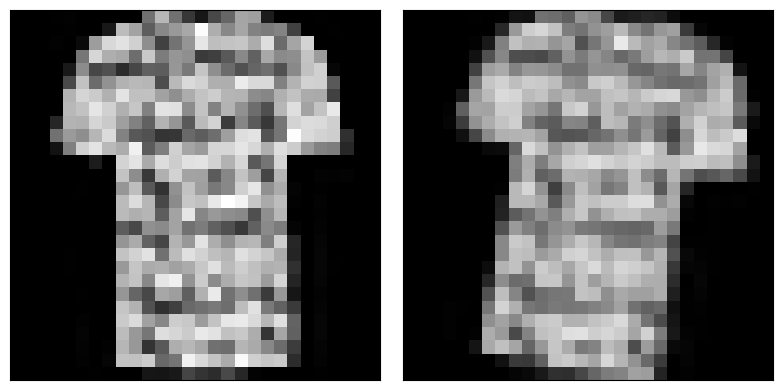

In [55]:
r_top = skimage.transform.rotate(top, -10)    # +/- 10 ~ 2 degrees 
show_image(x_tr_sc, top_int, r_top)

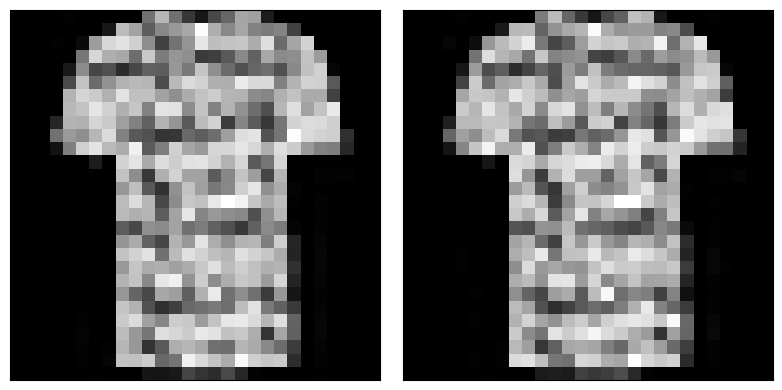

In [56]:
noisy_top1 = skimage.util.random_noise(top, mode='gaussian')
noisy_top2= skimage.util.random_noise(top, mode='localvar')
noisy_top3= skimage.util.random_noise(top, mode='salt')
noisy_top4= skimage.util.random_noise(top, mode='pepper')
noisy_top5= skimage.util.random_noise(top, mode='s&p')
noisy_top6= skimage.util.random_noise(top, mode='speckle')
noisy_top7= skimage.util.random_noise(top, mode='poisson')

show_image(x_tr_sc, top_int, noisy_top7)

# Making the Model!

In [57]:
# File handling
import pickle
import os
# General functions
import pandas as pd

# Sci-kit learn
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, PredefinedSplit
from sklearn.neural_network import MLPClassifier
import sklearn.pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler
# import sklearn.linear_model
# import sklearn.model_selection as skms
# import sklearn.feature_selection
# from sklearn.utils import shuffle
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# new_x_tr_sc - Updated training set
# new_x_va_sc - Updated validation set
# new_y_tr - Updated classes in training
# new_y_va - Updated classes in validation set.

# Combine training and validation datasets
new_x_all = np.vstack((new_x_tr_sc, new_x_va_sc))
new_y_all = np.hstack((new_y_tr, new_y_va))

print("Training X shape: %s\nValidation X shape: %s\nCombined X shape: %s\n" % (new_x_tr_sc.shape, new_x_va_sc.shape, new_x_all.shape))
print("Training Y shape: %s\nValidation Y shape: %s\nCombined Y shape: %s\n" % (new_y_tr.shape, new_y_va.shape, new_y_all.shape))

valid_indicators2 = np.hstack([
    -1 * np.ones(new_y_tr.shape[0]), # -1 means never include this example in any test split
    0  * np.ones(new_y_va.shape[0]), #  0 means include in the first test split (we count starting at 0 in python)
    ])

# Define custom splitter to use only the validation dataset for hyperparameter selection
print("Splitter dimensions: %i" % (valid_indicators2.shape[0]))
our_splitter = PredefinedSplit(valid_indicators2)

Training X shape: (4800, 784)
Validation X shape: (560, 784)
Combined X shape: (5360, 784)

Training Y shape: (4800,)
Validation Y shape: (560,)
Combined Y shape: (5360,)

Splitter dimensions: 5360


## Coarse Grid Search

In [59]:
# Removed following parameters that don't apply to lbfgs:
# batch size only for non-lbfgs. 
# Learning Rate = const, adaptive, etc... ONLY for sgd
# learning_rate_init only used for sgd or adam
# early_stopping, n_iter_no_change and validation_fraction only for sgd/adam.

# new_x_tr_sc - Updated training set
# new_x_va_sc - Updated validation set
# new y_tr - Updated classes in training
# new y_va - Updated classes in validation set.
scaling = True
flag = 'skip'
filename = '2_coarse_grid_search.sav'


if os.path.isfile("./" + filename) and flag != 'run':
    grid_2_model = pickle.load(open(filename, 'rb'))
else:
    rand_param_dist2 = dict(hidden_layer_sizes=[(10,),(20,),(50,),(100,)], activation=('identity', 'relu'), max_iter = np.logspace(1,2.6,6,dtype=int), alpha = np.logspace(-5,3,9))

    grid_2_model =   sklearn.pipeline.Pipeline([
        ('grid_search', GridSearchCV(MLPClassifier(solver='lbfgs', random_state=0), rand_param_dist2, scoring='balanced_accuracy', error_score='raise', return_train_score=True, cv= our_splitter, n_jobs = -1))
    ])

    # Fit on x_all as the custom splitter will divide this into tr and val
    grid_2_model.fit(new_x_all, new_y_all)
    pickle.dump(grid_2_model, open(filename, 'wb'))

In [92]:
best_est = grid_2_model['grid_search'].best_params_
#best_est.fit(x_all_sc, y_all_df['class_uid'])
print(best_est)

In [71]:
#Checking normal accuracy, not balanced accuracy
tr_acc = sklearn.metrics.accuracy_score(new_y_tr, best_est.predict(new_x_tr_sc))
va_acc = sklearn.metrics.accuracy_score(new_y_va, best_est.predict(new_x_va_sc))
print("Training balanced accuracy: %f\nValidation balanced accuracy: %f" % (tr_acc, va_acc))

Training balanced accuracy: 0.787708
Validation balanced accuracy: 0.983929


In [74]:
# new_x_tr_sc - Updated training set
# new_x_va_sc - Updated validation set
# new y_tr - Updated classes in training
# new y_va - Updated classes in validation set.
scaling = True
flag = 'run'
filename = '2_2nd_coarse_grid_search.sav'


if os.path.isfile("./" + filename) and flag != 'run':
    grid_3_model = pickle.load(open(filename, 'rb'))
else:
    rand_param_dist2 = dict(hidden_layer_sizes=[(45,), (48,), (50,),(52,), (55, )], max_iter = np.logspace(1,2.6,6,dtype=int), alpha = np.logspace(-1, 3, 5))

    grid_3_model =   sklearn.pipeline.Pipeline([
        ('grid_search', GridSearchCV(MLPClassifier(solver='lbfgs', random_state=0, activation='relu'), rand_param_dist2, scoring='balanced_accuracy', error_score='raise', return_train_score=True, cv= our_splitter, n_jobs = -1))
    ])

    # Fit on x_all as the custom splitter will divide this into tr and val
    grid_3_model.fit(new_x_all, new_y_all)
    pickle.dump(grid_3_model, open(filename, 'wb'))

c:\Users\leigh\micromamba\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [80]:
better_est = grid_3_model['grid_search'].best_estimator_

In [78]:
#Checking normal accuracy, not balanced accuracy
tr_acc2 = sklearn.metrics.accuracy_score(new_y_tr, better_est.predict(new_x_tr_sc))
va_acc2 = sklearn.metrics.accuracy_score(new_y_va, better_est.predict(new_x_va_sc))
print("Training balanced accuracy: %f\nValidation balanced accuracy: %f" % (tr_acc2, va_acc2))

Training balanced accuracy: 0.818958
Validation balanced accuracy: 0.912500
